In [ ]:
#------------------------ASSIGNEMNT-16-----------------------------!

In [ ]:
#---------------------------KNN-----------------------------------

In [132]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [134]:
# Loading the dataset
data = pd.read_csv("C:\\Users\\Ashish\\Downloads\\Data Science Assignments\\KNN\\Zoo.csv")

In [52]:
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None


In [54]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std   

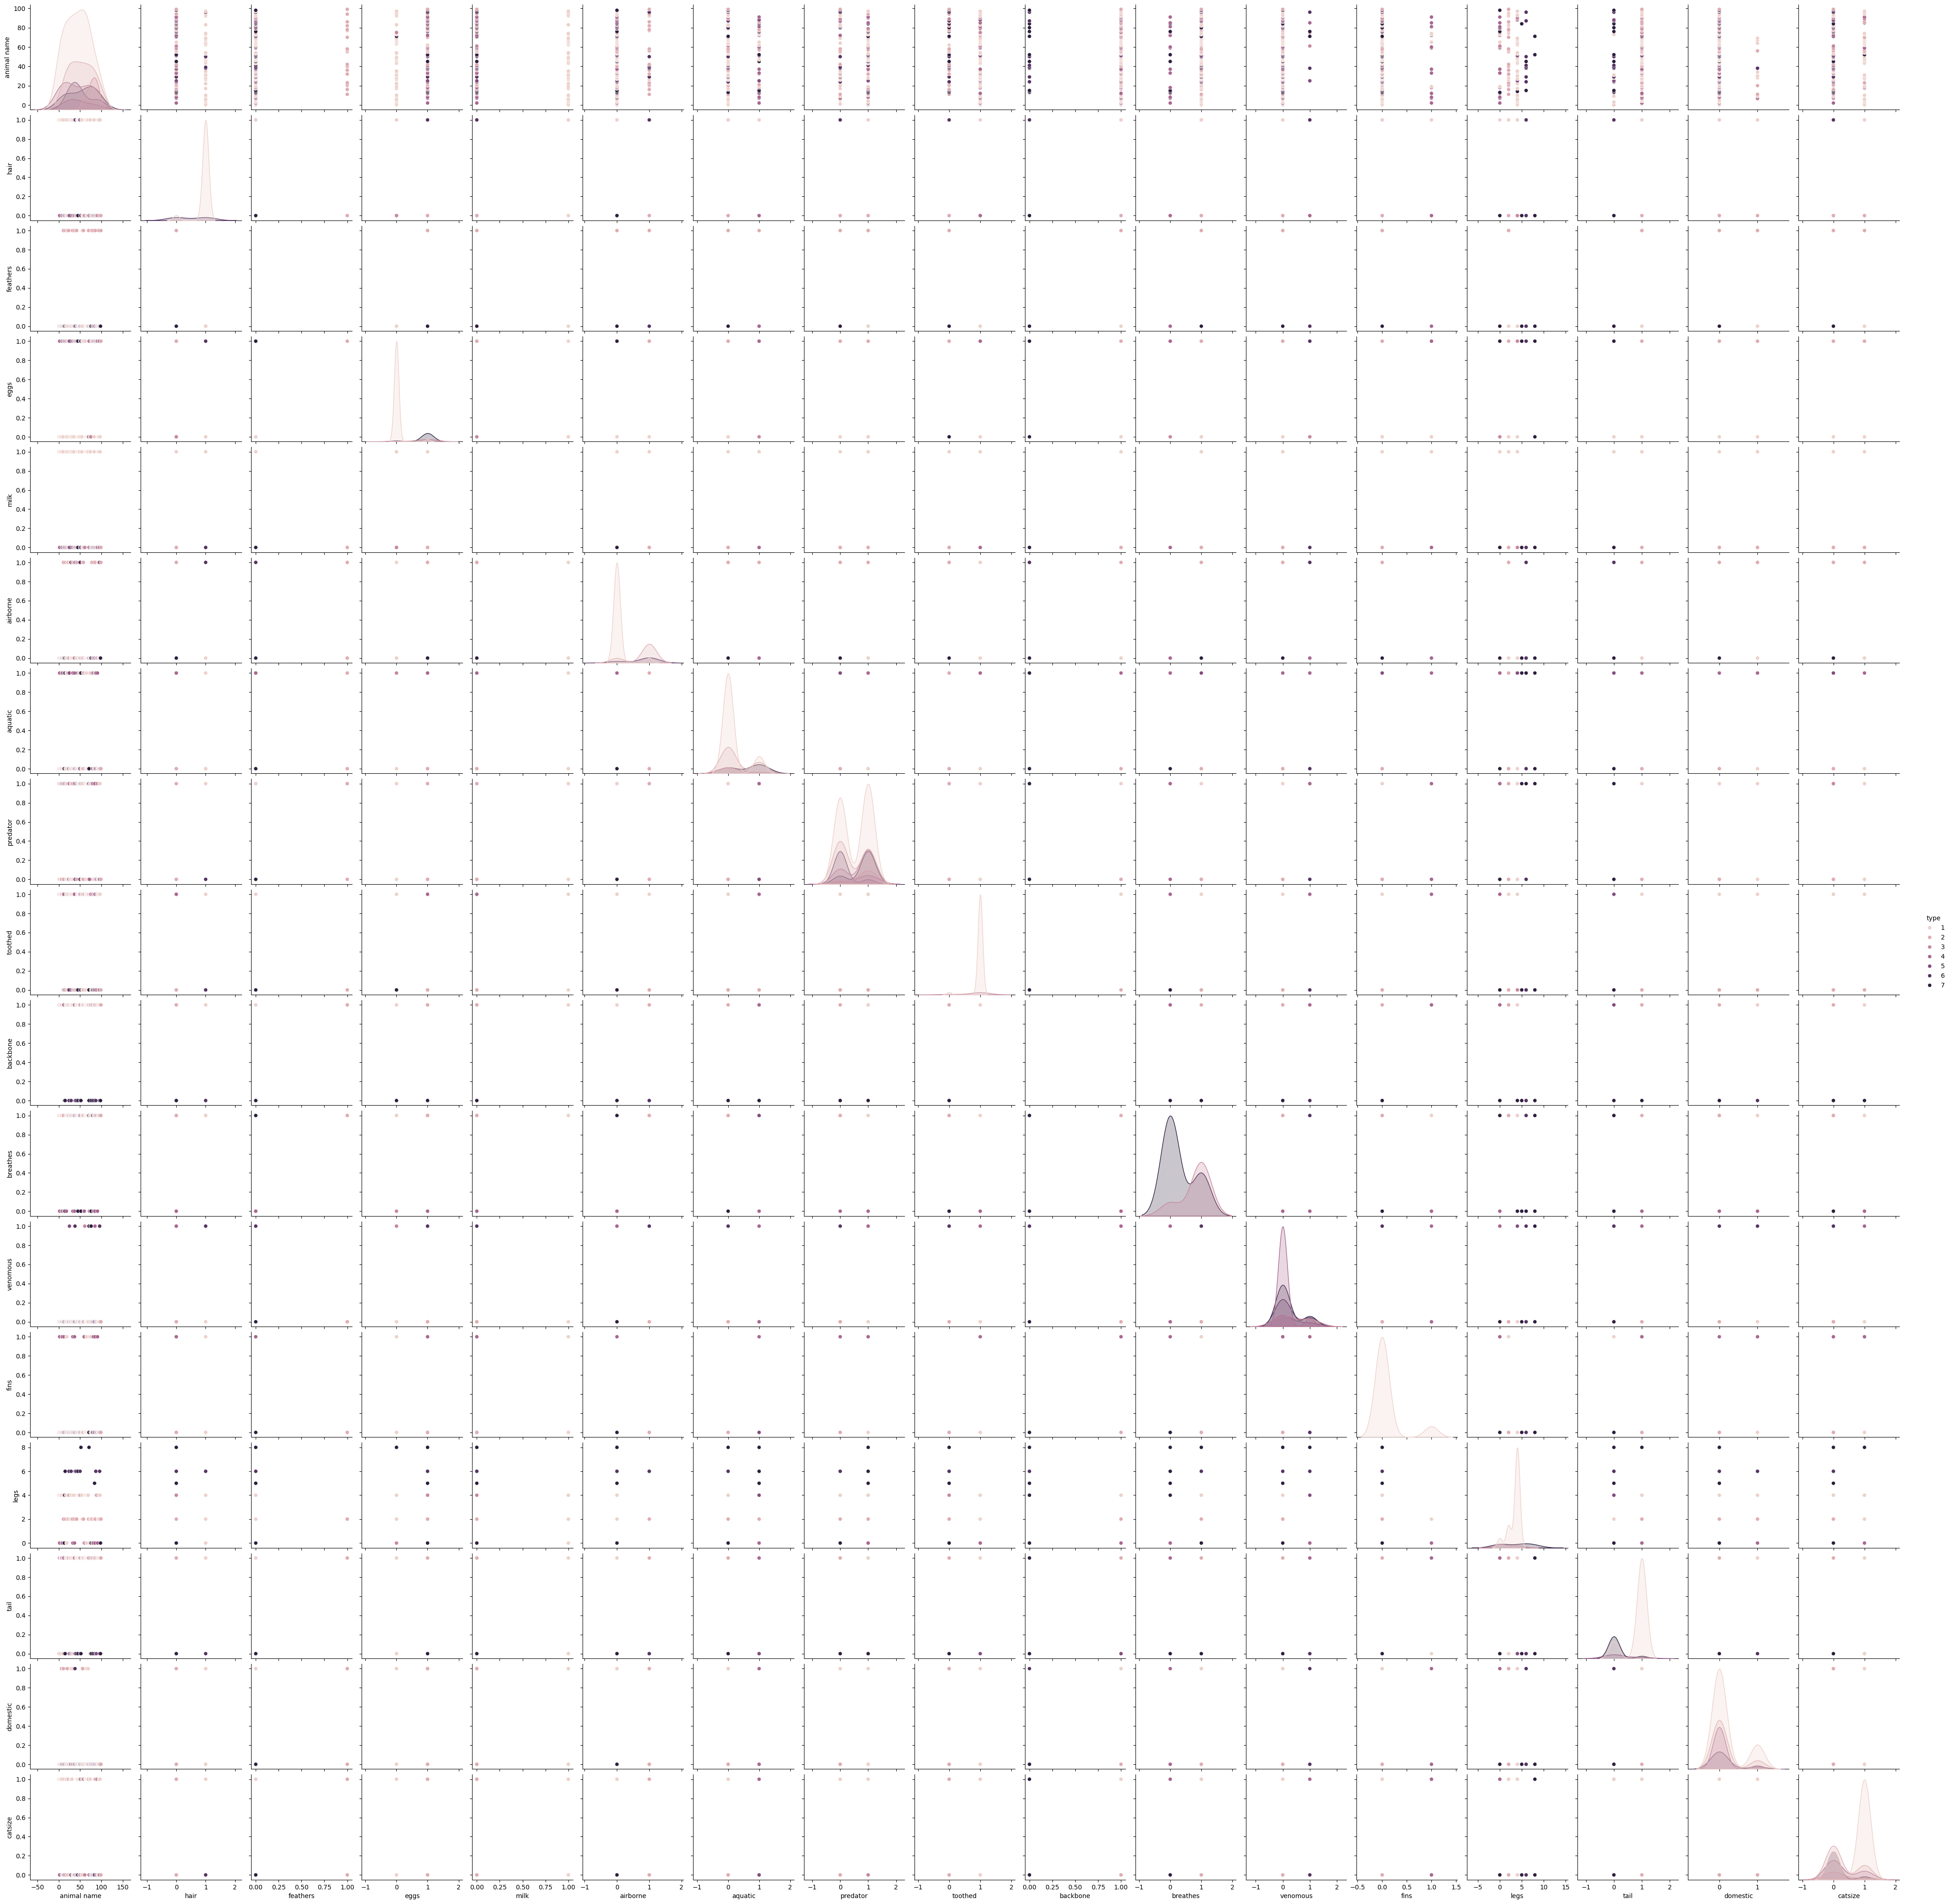

In [46]:
# Visualize the distribution of features
sns.pairplot(data, hue='type') 
plt.show()

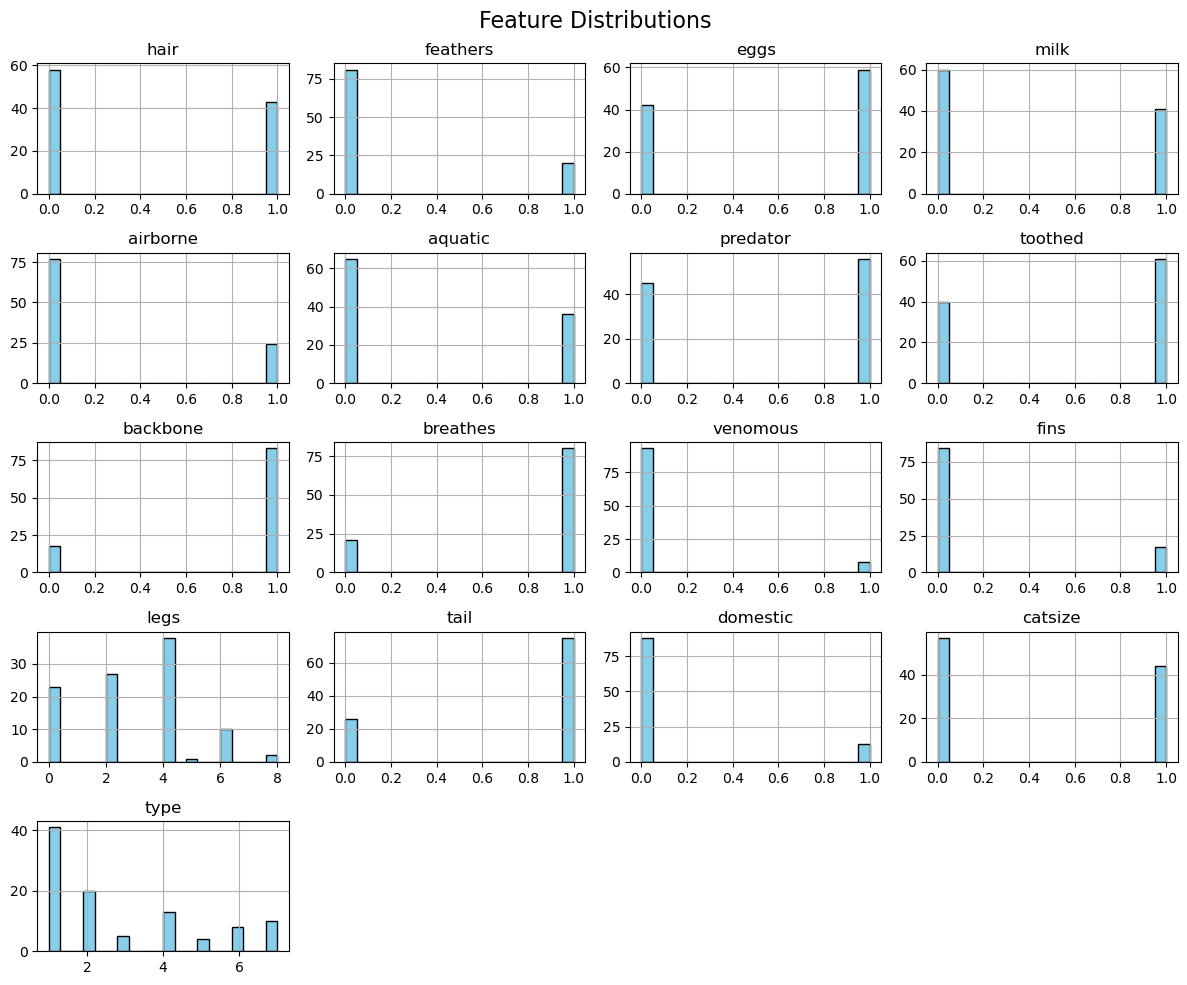

In [56]:
# Visualize distributions of numerical features
data.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

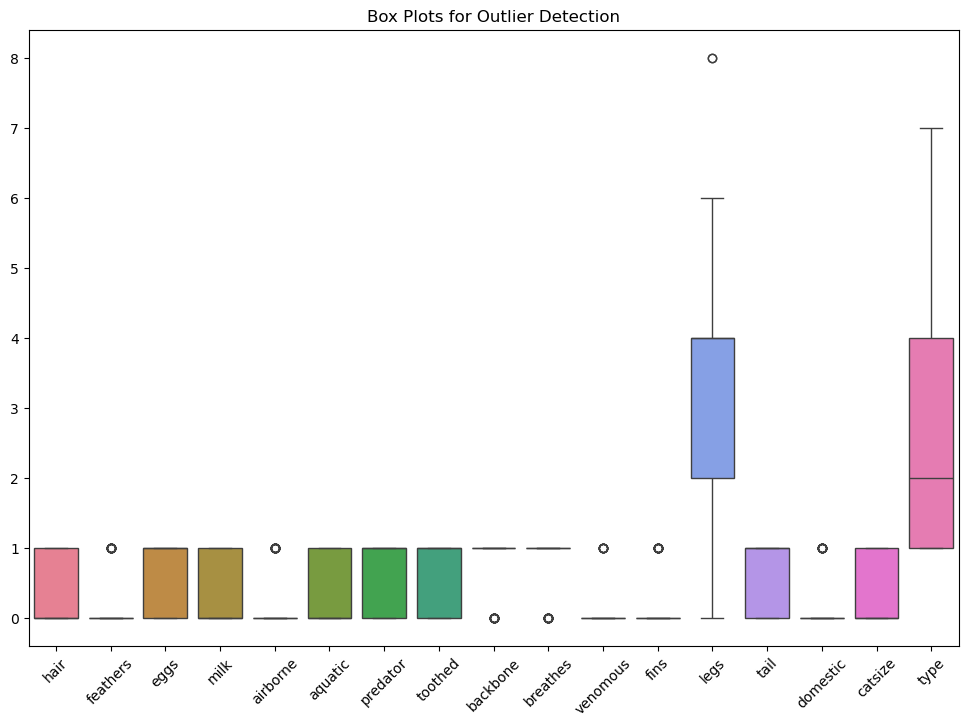

In [60]:
# Box plots to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data)
plt.title("Box Plots for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

In [62]:
#Data Preprocessing
label_encoder = LabelEncoder()
data['animal name'] = label_encoder.fit_transform(data['animal name']) 

In [64]:
data = pd.get_dummies(data, drop_first=True)

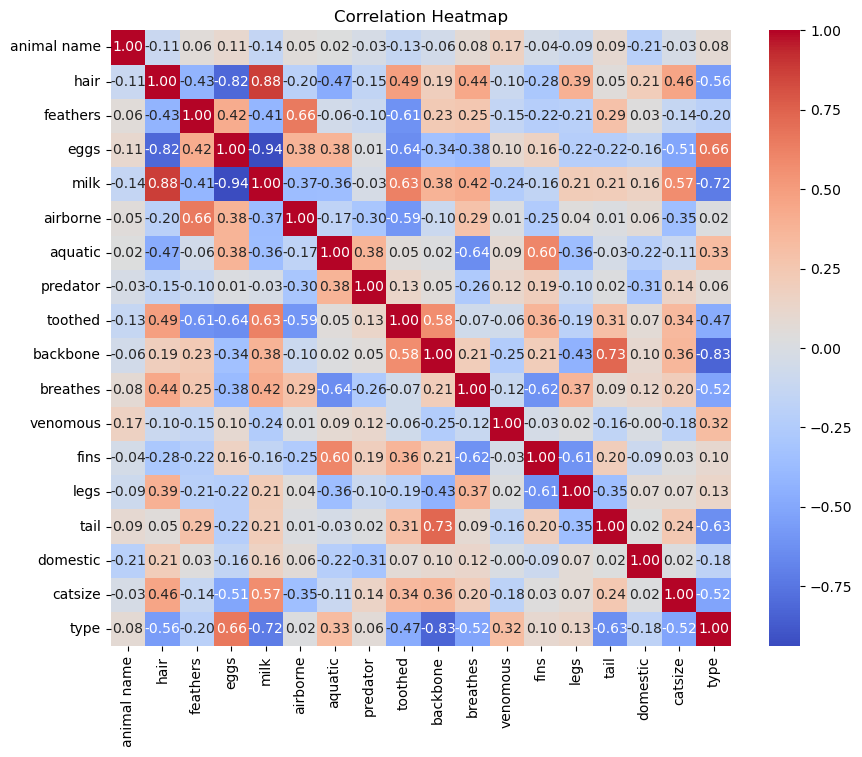

In [66]:
#Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [68]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [70]:
# Handle missing values
data.fillna(data.median(), inplace=True)

In [72]:
# Handle outliers using the IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [106]:
data_filtered = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [110]:
print(data_filtered.describe())

       animal name       hair  feathers       eggs       milk  airborne  \
count    33.000000  33.000000      33.0  33.000000  33.000000      33.0   
mean     48.121212   0.818182       0.0   0.212121   0.818182       0.0   
std      30.597955   0.391675       0.0   0.415149   0.391675       0.0   
min       0.000000   0.000000       0.0   0.000000   0.000000       0.0   
25%      25.000000   1.000000       0.0   0.000000   1.000000       0.0   
50%      48.000000   1.000000       0.0   0.000000   1.000000       0.0   
75%      68.000000   1.000000       0.0   0.000000   1.000000       0.0   
max      97.000000   1.000000       0.0   1.000000   1.000000       0.0   

         aquatic   predator    toothed  backbone  breathes  venomous  fins  \
count  33.000000  33.000000  33.000000      33.0      33.0      33.0  33.0   
mean    0.151515   0.606061   0.939394       1.0       1.0       0.0   0.0   
std     0.364110   0.496198   0.242306       0.0       0.0       0.0   0.0   
min     0.00

In [136]:
#Split the dataset into training and testing sets
X = data_filtered.drop(columns=['type']) 
y = data_filtered['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26, 17) (7, 17) (26,) (7,)


In [138]:
X_train_vis = X_train.iloc[:, :3] 
X_test_vis = X_test.iloc[:, :3]

In [349]:
#Implement KNN
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train_vis, y_train)

KNeighborsClassifier(metric='euclidean')

In [351]:
#Evaluate the classifier
y_pred = knn.predict(X_test_vis)

In [353]:
#Perfomance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7142857142857143
Precision: 0.8571428571428571
Recall: 0.7142857142857143
F1 Score: 0.7142857142857143


C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashish\anaconda3\Lib\site-packages\s


Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.83      0.83         6
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1

    accuracy                           0.71         7
   macro avg       0.28      0.28      0.28         7
weighted avg       0.71      0.71      0.71         7


Confusion Matrix:


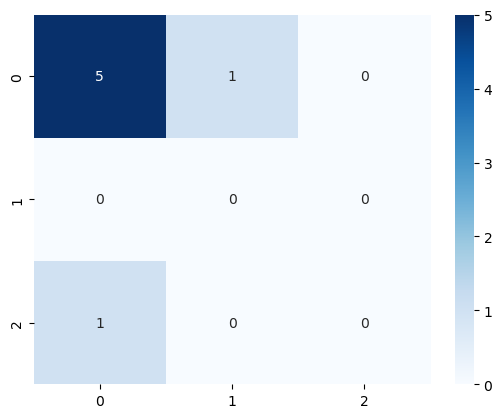

In [355]:
# Classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.show()

In [357]:
X_vis = X_train.iloc[:, :2].values  
y_vis = y_train

In [359]:
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [361]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])  # Padding with zeros for other features
Z = Z.reshape(xx.shape)

C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


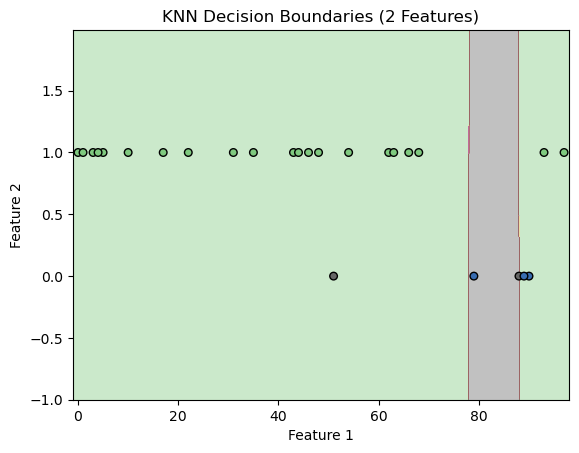

In [362]:
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Accent)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, s=30, edgecolor='k', cmap=plt.cm.Accent)
plt.title('KNN Decision Boundaries (2 Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
#For Knn with n=7 neighbours (Highest Accuracy observed in this case)

In [367]:
#Implement KNN
k = 7
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train_vis, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [369]:
#Evaluate the classifier
y_pred = knn.predict(X_test_vis)

#Perfomance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8571428571428571
Precision: 0.8775510204081632
Recall: 0.8571428571428571
F1 Score: 0.7912087912087912


C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           5       0.00      0.00      0.00         1

    accuracy                           0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79         7


Confusion Matrix:


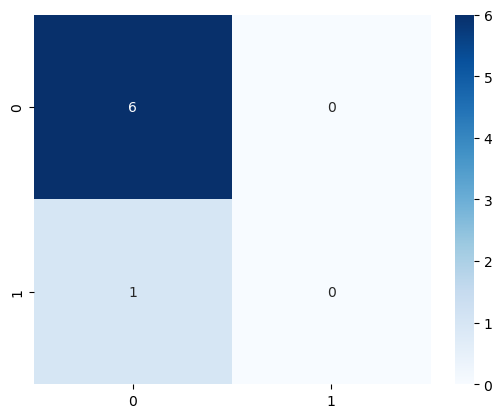

In [371]:
# Classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.show()

In [373]:
X_vis = X_train.iloc[:, :2].values  
y_vis = y_train

C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


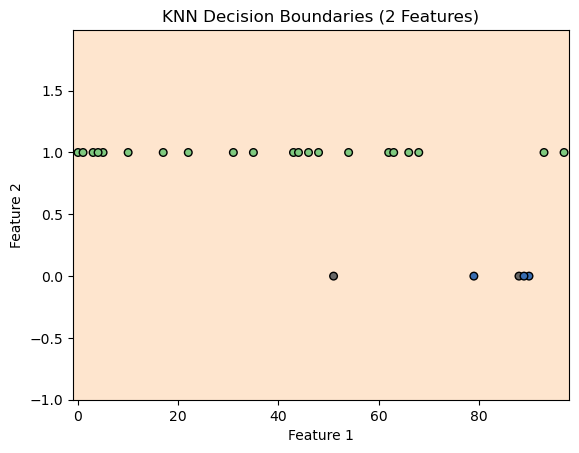

In [375]:
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])  # Padding with zeros for other features
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Accent)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, s=30, edgecolor='k', cmap=plt.cm.Accent)
plt.title('KNN Decision Boundaries (2 Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [363]:
#Interview Questions

In [ ]:
# 1)What are the key hyperparameters in KNN?

Answer:

The main hyperparameters in the K-Nearest Neighbors (KNN) algorithm are:
    
Number of Neighbors (K): The number of neighbors to take into account is determined by the number of neighbors (K). While a large K could underfit, a small K runs the danger of overfitting.
Distance Metric: Specifies the methods used to determine distances, such as Minkowski, Manhattan, or Euclidean.
Weighting of Neighbors: Neighbors can be ranked either by proximity (distance-based) or equally (uniform).
There are several options for the neighbor search algorithm, including auto, ball_tree, kd_tree, and brute.
Leaf Size: Controls the trade-off between performance and memory; relevant for tree-based approaches.

In [ ]:
# 2)What distance metrics can be used in KNN?

Answer:

Euclidean Distance: Ideal for features with similar scales and continuous variables.

Manhattan Distance: It works well with high-dimensional data and features that might have varying scales.

Minkowski Distance: A generalization of the Manhattan and Euclidean distances is the Minkowski distance.

Chebyshev Distance : The Chebyshev Distance calculates the greatest variation along any given dimension.

Hamming Distance: It measures the number of different elements in categorical data.

Cosine Similarity: Calculates the angle between two vectors and converts it to distance and frequently applied to sparse or textual data.

Mahalanobis Distance: It is scale-invariant and takes feature correlations into account.